# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [4]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 2 of set 0 | fomboni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 3 of set 0 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 4 of set 0 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 5 of set 0 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 6 of set 0 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 7 of set 0 | avarua
http://api.openweathermap.org/data/2.5/weather?unit

Processing record 7 of set 1 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 8 of set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 9 of set 1 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
City not found!
Processing record 10 of set 1 | tucuman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 11 of set 1 | yenagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 12 of set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
City not found!
Processing record 13 of set 1 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0b

Processing record 14 of set 2 | meilu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
City not found!
Processing record 15 of set 2 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 16 of set 2 | jibuti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 17 of set 2 | butembo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 18 of set 2 | yuanping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 19 of set 2 | rodrigues alves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 20 of set 2 | nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc

Processing record 21 of set 3 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 22 of set 3 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
City not found!
Processing record 23 of set 3 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 24 of set 3 | antas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 25 of set 3 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 26 of set 3 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 27 of set 3 | peterhead
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da

Processing record 28 of set 4 | chapleau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 29 of set 4 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 30 of set 4 | atikokan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 31 of set 4 | kwinana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 32 of set 4 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 33 of set 4 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 34 of set 4 | gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc

Processing record 35 of set 5 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 36 of set 5 | marrakesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 37 of set 5 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 38 of set 5 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 39 of set 5 | sierra vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 40 of set 5 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 41 of set 5 | toliary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc

Processing record 42 of set 6 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 43 of set 6 | pacific grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 44 of set 6 | valleyview
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 45 of set 6 | ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 46 of set 6 | grants pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 47 of set 6 | gao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 48 of set 6 | boa vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9

Processing record 50 of set 7 | stony plain
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 0 of set 8 | jaipur hat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
City not found!
Processing record 1 of set 8 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 2 of set 8 | bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 3 of set 8 | bogacs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 4 of set 8 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 5 of set 8 | tahe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0d

Processing record 7 of set 9 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 8 of set 9 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 9 of set 9 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 10 of set 9 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 11 of set 9 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 12 of set 9 | karacakoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 13 of set 9 | tahoua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processin

Processing record 14 of set 10 | maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 15 of set 10 | mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 16 of set 10 | kapchorwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 17 of set 10 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 18 of set 10 | chivilcoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 19 of set 10 | lafia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 20 of set 10 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Proces

Processing record 22 of set 11 | la asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 23 of set 11 | naron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 24 of set 11 | banjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 25 of set 11 | piran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 26 of set 11 | zhirnovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 27 of set 11 | conner
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9a0b6cabc
Processing record 28 of set 11 | felipe carrillo puerto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c27676020d2317d0bc4c0da9

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
city_df = pd.DataFrame(weather_dict)
city_df.count()


City          591
Cloudiness    591
Country       591
Date          591
Humidity      591
Temp          591
Lat           591
Lng           591
Wind Speed    591
dtype: int64

In [6]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,hilo,75,US,1612995067,53,78.80,19.7297,-155.0900,4.61
1,fomboni,92,KM,1612995067,75,83.57,-12.2800,43.7425,20.13
2,lebu,1,CL,1612995002,71,66.92,-37.6167,-73.6500,9.51
3,jamestown,90,US,1612995065,58,23.00,42.0970,-79.2353,3.44
4,coihaique,0,CL,1612995067,27,89.60,-45.5752,-72.0662,9.22


In [7]:
city_df.to_csv(r'output_data\cities.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

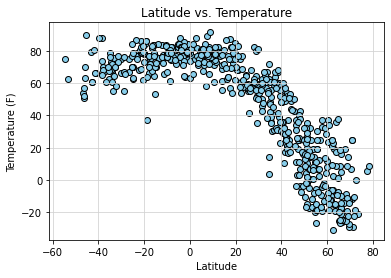

In [10]:
plt.scatter(city_df["Lat"],city_df["Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/TempVsLat.png")
plt.show()

## Latitude vs. Humidity Plot

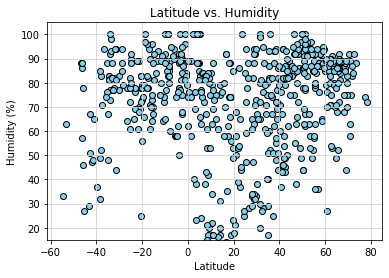

In [11]:
plt.scatter(city_df["Lat"],city_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/LatVsHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

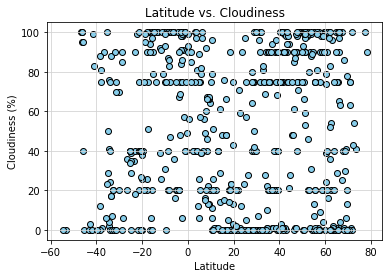

In [12]:
plt.scatter(city_df["Lat"],city_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

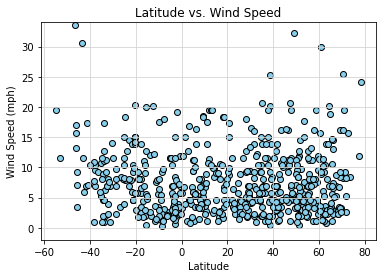

In [13]:
plt.scatter(city_df["Lat"],city_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/LatVsWind.png")
plt.show()

## Linear Regression

In [14]:
northern_hemisphere = city_df.loc[city_df["Lat"] >= 0]
southern_hemisphere = city_df.loc[city_df["Lat"] < 0]

In [15]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Temp"])

annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Temp (F)")

# Save the figure
plt.savefig("Figures/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

NameError: name 'st' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression